This file is part of a program that is used to develop an objective way to
segment the fetus from ultrasound images, and to analyse the effectiveness of 
using the resulting mask to produce an unobstructed visualisation of the fetus.
The research is organised in three phases: (1) noise reduction filters, 
(2a) heuristic segmentation models, (2b) deep learning segmentation
approach (U-net), and (3) the volume visualisation. The program is developed
for the master Computational Science at the UvA from February to November 2020.

This file contains code for the volume visualisation. <br>
You can run this file to generate the seamless looping animations.  

Made by Romy Meester


In [1]:
"""
Phase 3: The volume visualisations.
- 2D animations through the 3D image
"""

import os
import numpy as np
import SimpleITK as sitk
import pickle
import time
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from tqdm import tqdm


In [2]:
# Constants
RESULTS_PATH = 'results_volumes'
RESULTS_ANI_PATH = os.path.join(RESULTS_PATH, 'results_volumes_animations')

RESULTS_ORG_PATH = os.path.join(RESULTS_ANI_PATH, 'animations_original') 
RESULTS_SMOOTHED_PATH = os.path.join(RESULTS_ANI_PATH, 'animations_smoothed') 
RESULTS_GT_PATH = os.path.join(RESULTS_ANI_PATH, 'animations_groundtruth') 
RESULTS_HEURISTICS_PATH = os.path.join(RESULTS_ANI_PATH, 'animations_heuristics')
RESULTS_UNET_PATH = os.path.join(RESULTS_ANI_PATH, 'animations_unet')

RESULTS_IMG_ORG_PATH = os.path.join(RESULTS_ANI_PATH, 'images_original') 
RESULTS_IMG_SMOOTHED_PATH = os.path.join(RESULTS_ANI_PATH, 'images_smoothed') 
RESULTS_IMG_GT_PATH = os.path.join(RESULTS_ANI_PATH, 'images_groundtruth') 
RESULTS_IMG_HEURISTICS_PATH = os.path.join(RESULTS_ANI_PATH, 'images_heuristics')
RESULTS_IMG_UNET_PATH = os.path.join(RESULTS_ANI_PATH, 'images_unet')

DATA_ORG_PATH = '../datasets/'
DATA_SMOOTHED_PATH = '../phase1/results_filters/results_filters_img'
DATA_HEUR_PATH = '../phase2a/results_heuristic_models/results_heuristics_img'
DATA_UNET_PATH = 'results_volumes/results_volumes_convert/convert_unet'

In [3]:
def create_dir(PATH):
    """ Create a directory. """
    try:
        os.mkdir(PATH)
        print('Directory', PATH, 'created' )
    except FileExistsError:
        print('Directory', PATH, 'already exists' )

# create results folder 
create_dir(RESULTS_PATH) 

# create results folder for animations
create_dir(RESULTS_ANI_PATH)   

# create results folders for animations
create_dir(RESULTS_ORG_PATH)
create_dir(RESULTS_SMOOTHED_PATH)
create_dir(RESULTS_GT_PATH)
create_dir(RESULTS_HEURISTICS_PATH)
create_dir(RESULTS_UNET_PATH)

# create results folders for middle slice image of animations
create_dir(RESULTS_IMG_ORG_PATH)
create_dir(RESULTS_IMG_SMOOTHED_PATH)
create_dir(RESULTS_IMG_GT_PATH)
create_dir(RESULTS_IMG_HEURISTICS_PATH)
create_dir(RESULTS_IMG_UNET_PATH)


Directory results_volumes already exists
Directory results_volumes\results_volumes_animations created
Directory results_volumes\results_volumes_animations\animations_original created
Directory results_volumes\results_volumes_animations\animations_smoothed created
Directory results_volumes\results_volumes_animations\animations_groundtruth created
Directory results_volumes\results_volumes_animations\animations_heuristics created
Directory results_volumes\results_volumes_animations\animations_unet created
Directory results_volumes\results_volumes_animations\images_original created
Directory results_volumes\results_volumes_animations\images_smoothed created
Directory results_volumes\results_volumes_animations\images_groundtruth created
Directory results_volumes\results_volumes_animations\images_heuristics created
Directory results_volumes\results_volumes_animations\images_unet created


# Original images

In [4]:
def load_scans(pathDicom):
    """ Load the dicom files into sitk with the image series reader.
    Input: path of the directory with the dicom files.
    Output: the 3D image.
    """
    
    reader = sitk.ImageSeriesReader()
    filenamesDICOM = reader.GetGDCMSeriesFileNames(pathDicom)
    reader.SetFileNames(filenamesDICOM)
    img = reader.Execute()
    return img

In [5]:
def get_data_dcm(rootdir, scans = 'org'):
    """ Generate the dataset of dcm files in a dictionary. """
    
    datasets = {}
    
    # the folders
    datasetnames = [f for f in os.listdir(rootdir) if os.path.isdir(os.path.join(rootdir, f))]
    print('Loading: ' + str(len(datasetnames)) + ' datasets')
    
    # which scans
    if scans == 'org':
        scan = '/crop_org'
    elif scans == 'gt':
        scan = '/crop_gt'
    
    # load scans to numpy
    for dataset in tqdm(datasetnames):
        time.sleep(0.1)
        
        images = load_scans(rootdir + dataset + scan) 
        images = sitk.GetArrayFromImage(images)
        
        # Save images in datasets dictionary
        datasets.update({dataset: images})

    print("datasets created")
    return datasets
    

In [6]:
# the original images in numpy arrays
org_images = get_data_dcm(DATA_ORG_PATH, scans ='org')

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loading: 7 datasets


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.13s/it]

datasets created


In [7]:
def animation(images, savename):
    """ Create an animation throught the slices of the 3D image. """
    
    # create figure
    fig, ax = plt.subplots(figsize=(8,6))


    def update(i):
        ax.imshow(images[i], cmap='gray')
        ax.set_title("Slice: {}/{}".format(i, len(images)), fontsize=20)
        ax.set_axis_off()


    anim = FuncAnimation(fig, update, frames=np.arange(0, len(images)), interval=50)
    anim.save(savename + '.gif', dpi=80, writer='imagemagick')
    plt.close()
    
def create_animations(datasets, savedir):
    """ Create the animations of all datasets. """
             
    print('Animate: ' + str(len(datasets)) + ' datasets')
    for data, values in tqdm(datasets.items()):
        time.sleep(0.1)
        
        savename = os.path.join(savedir, data)
        animation(values, savename)
    
    print('animations created')
    

In [8]:
# create animations of the original images
create_animations(datasets = org_images, savedir = RESULTS_ORG_PATH)

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Animate: 7 datasets


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [19:05<00:00, 163.67s/it]

animations created


In [9]:
def create_images(datasets, savedir):
    """ Create the middle 2D slice of the 3D image of all datasets. """
    
    for data, image in datasets.items():        
        savename = os.path.join(savedir, data)
        index = round(image.shape[0] /2.)
        
        plt.imshow(image[index], cmap='gray') 
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(savename + '.png')
        plt.show()
            
    print('images created')


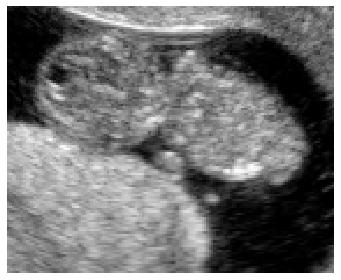

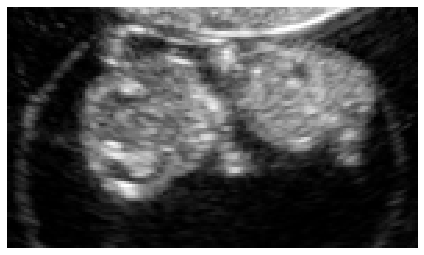

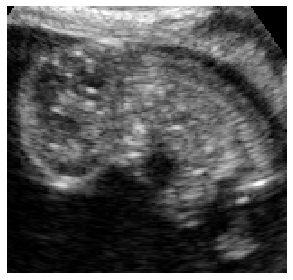

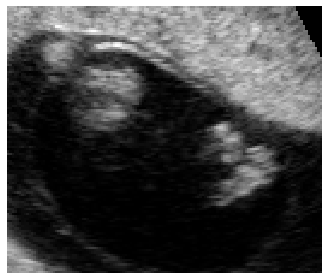

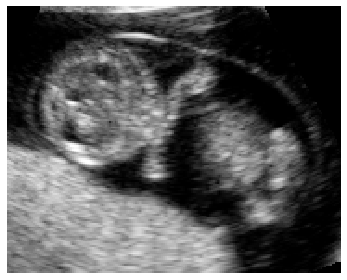

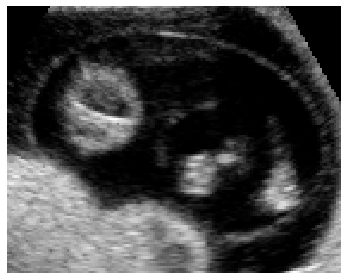

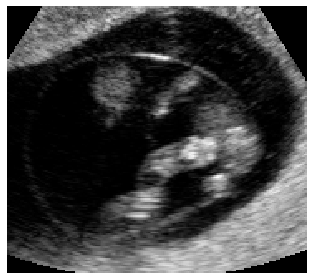

images created


In [10]:
# create 2D image of the original images
create_images(datasets = org_images, savedir = RESULTS_IMG_ORG_PATH)

# Smoothed images

In [11]:
def load_data_smoothed_pickle(PATH, filename):
    """ Load data from file using pickle. """
    with open(PATH + '/' + filename + ".pkl","rb") as f:
        new_data = pickle.load(f)
    return new_data

def get_data_smoothedimages(rootdir, filterdata):
    """ Get the data of the specified smoothed images. """
    
    datasets = {}
        
    # the files
    alldatasetnames = [f for f in os.listdir(rootdir) if os.path.isfile(os.path.join(rootdir, f))]
    datasetnames = []
    for name in alldatasetnames:
        if filterdata['filtername'] and str(filterdata['parameters'][0]) in name:
            try: 
                if str(filterdata['parameters'][0]) and str(filterdata['parameters'][1])  in name:
                    datasetnames.append(name[:-4])
            except:
                datasetnames.append(name[:-4])
    
    # load scans to numpy
    print('Loading: ' + str(len(datasetnames)) + ' datasets')
    for dataset in tqdm(datasetnames):
        time.sleep(0.1)
        
        images_smoothed = load_data_smoothed_pickle(rootdir, dataset) 
      
        # Save images in datasets dictionary
        datasetname = dataset.split('_', 1)[0]
        datasets.update({datasetname: images_smoothed})

    print("datasets created")
    return datasets


In [12]:
# the smoothed images in numpy arrays
filterdata = {'filtername': 'anisodiff', 'parameters': [10, 0.04, 4]}
smoothed_images = get_data_smoothedimages(DATA_SMOOTHED_PATH, filterdata)

 14%|████████████                                                                        | 1/7 [00:00<00:00,  7.98it/s]

Loading: 7 datasets


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.22it/s]

datasets created


In [13]:
# create animations of the smoothed images
create_animations(datasets = smoothed_images, savedir = RESULTS_SMOOTHED_PATH)

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Animate: 7 datasets


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [22:18<00:00, 191.21s/it]

animations created


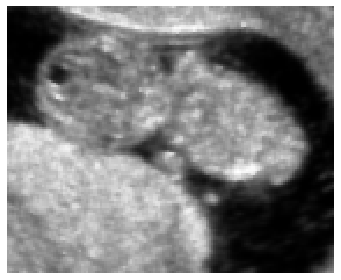

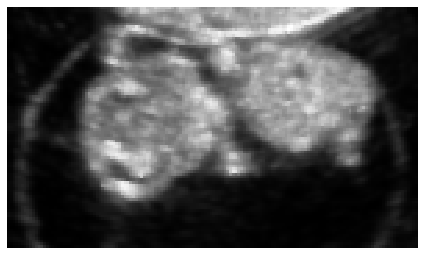

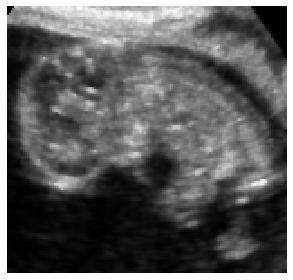

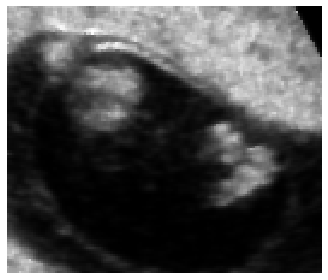

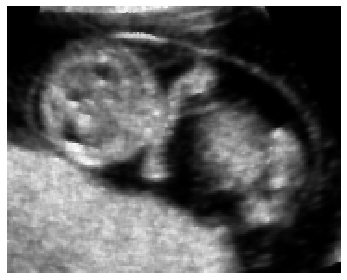

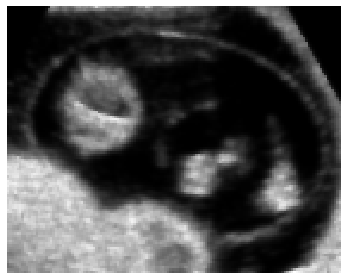

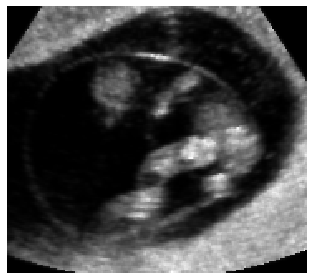

images created


In [14]:
# create 2D image of the smoothed images
create_images(datasets = smoothed_images, savedir = RESULTS_IMG_SMOOTHED_PATH)

# Ground truth 

In [15]:
# the ground truth images in numpy arrays
gt_images = get_data_dcm(DATA_ORG_PATH, scans ='gt')

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loading: 7 datasets


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]

datasets created


In [16]:
# create animations of the ground truth images
create_animations(datasets = gt_images, savedir = RESULTS_GT_PATH)

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Animate: 7 datasets


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [20:15<00:00, 173.61s/it]

animations created


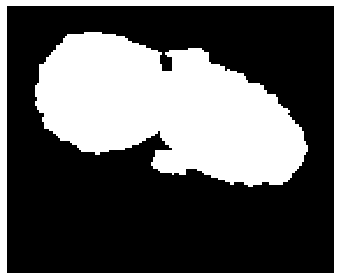

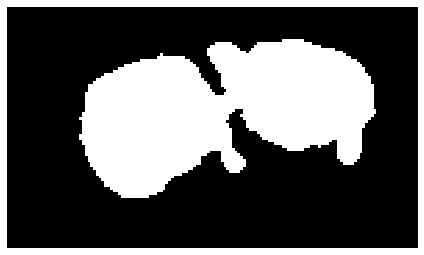

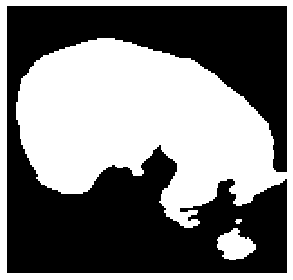

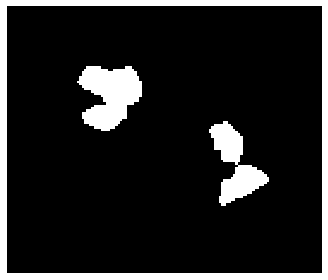

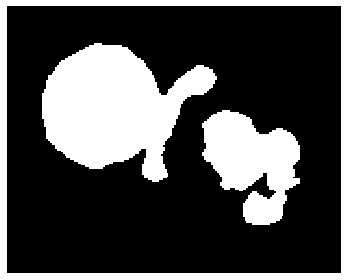

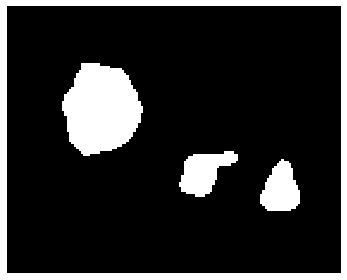

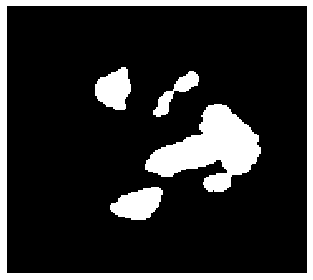

images created


In [17]:
# create 2D image of the ground truth images
create_images(datasets = gt_images, savedir = RESULTS_IMG_GT_PATH)

# Heuristic segmentations

In [18]:
# get all the heuristic segmentations
def get_allfilenames(path): 
    """ Get the unique filenames. """
    filenames = []
    allfiles = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    
    for item, name in enumerate(allfiles):
        filenames.append(name[:-4])

    return filenames

def load_data_pickle(PATH, filename):
    """ Load data from file using pickle. """
    with open(PATH + '/' + filename + ".pkl","rb") as f:
        new_data = pickle.load(f)
    return new_data


def get_data_heuristics(rootdir):
    """ Generate the dataset of pickle files with numpy arrays in a dictionary. """
    
    datasets = {}
    
    # the folders
    datasetnames = get_allfilenames(rootdir)
    print('Loading: ' + str(len(datasetnames)))
 
    # load scans to numpy
    for dataset in tqdm(datasetnames):
        time.sleep(0.1)
        
        images = load_data_pickle(rootdir, dataset) 

        # Save images in datasets dictionary
        datasets.update({dataset: images})

    print("datasets created")
    return datasets


In [19]:
# the heuristic images in numpy arrays 
heuristic_images = get_data_heuristics(rootdir = DATA_HEUR_PATH)

  4%|██▉                                                                                | 1/28 [00:00<00:02,  9.52it/s]

Loading: 28


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:03<00:00,  8.98it/s]

datasets created


In [20]:
def create_colors(frame_gt, frame_prediction):
    """ Create colored predicted image by comparing the prediction
    to the ground truth. True positives are white, true negatives are black
    false positives are green, and false negatives are red. """
    
    frame_result = np.zeros((frame_prediction.shape[0],frame_prediction.shape[1], frame_prediction.shape[2] ,3), dtype=np.uint8)
    frame_result[frame_prediction == 1] = [255, 255, 255] # white: true positives

    frame_result[(frame_prediction == 1) & (frame_gt == 0)] = [0, 255, 0] # green: false positives
    frame_result[(frame_prediction == 0) & (frame_gt == 1)] = [255, 0, 0] # red: false negatives

    return frame_result

def generate_colorimage(predicted_datasets, gt_datasets):
    """ Generate the colored predicted image. """
    
    datasets = {}
 
    # compare the predicted images to the ground truth 
    for predicted_key, predicted_image in predicted_datasets.items():
        dataset_key = predicted_key.split('_', 1)[0]
        image = create_colors(gt_datasets[dataset_key], predicted_image)
        
        # Save images in datasets dictionary
        datasets.update({predicted_key: image})
        
    print("datasets created") 
    return datasets


In [21]:
# the colored heuristic images
colored_heuristic_images = generate_colorimage(heuristic_images, gt_images)

datasets created


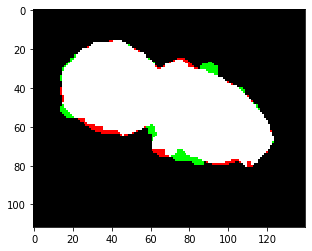

In [22]:
# example
image = colored_heuristic_images['dataset6_ws_semiauto_org']
plt.imshow(image[55], cmap='gray')
plt.show()

In [23]:
# create animations of the heuristic model images
create_animations(datasets = colored_heuristic_images, savedir = RESULTS_HEURISTICS_PATH)

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Animate: 28 datasets


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [38:36<00:00, 82.73s/it]

animations created


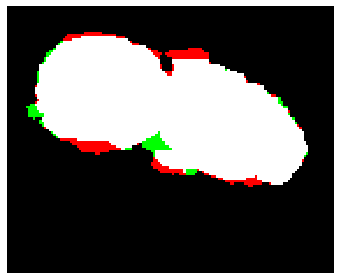

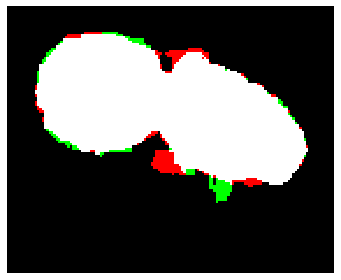

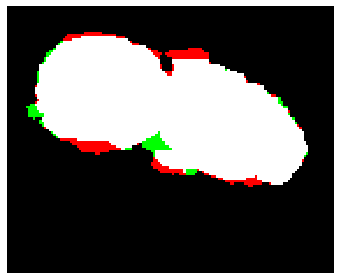

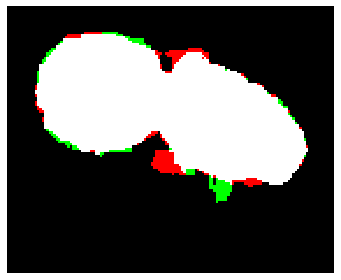

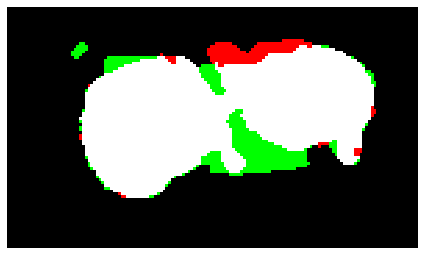

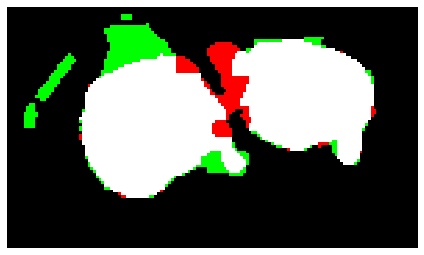

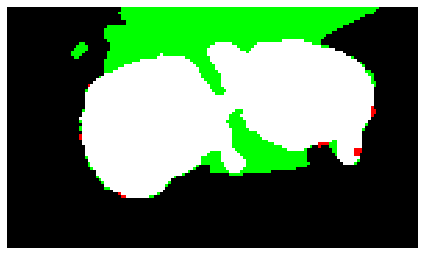

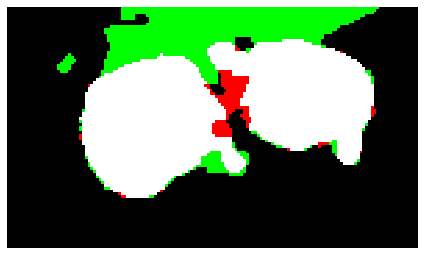

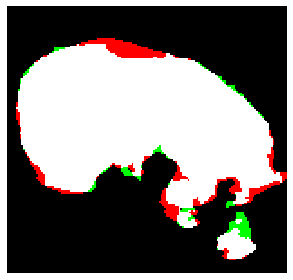

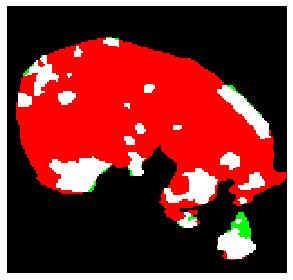

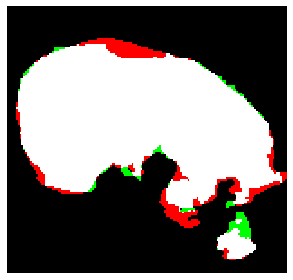

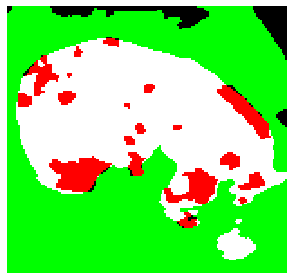

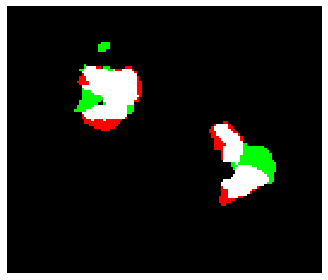

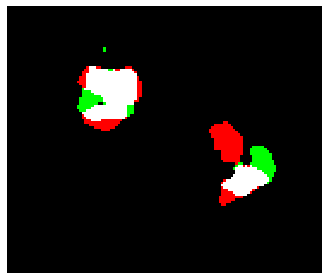

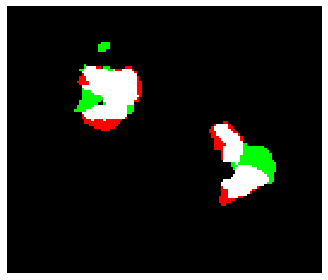

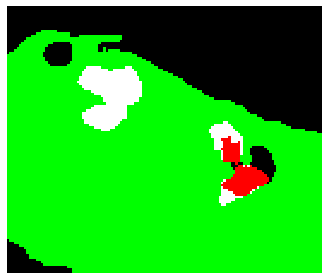

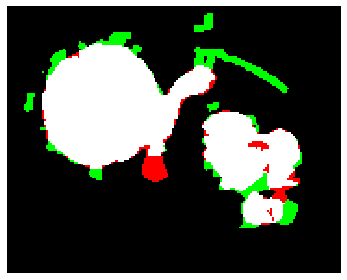

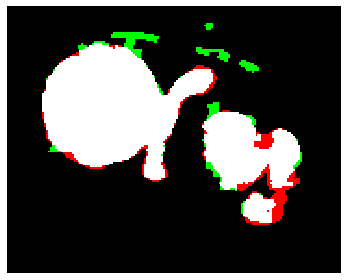

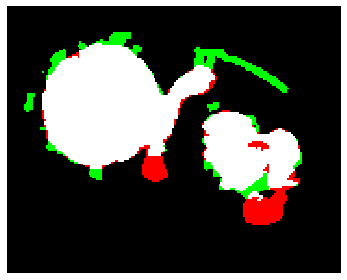

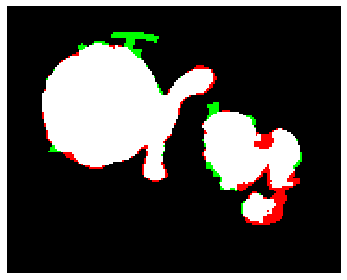

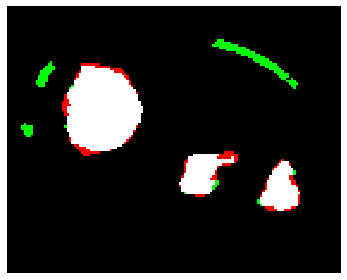

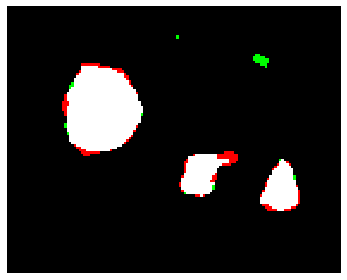

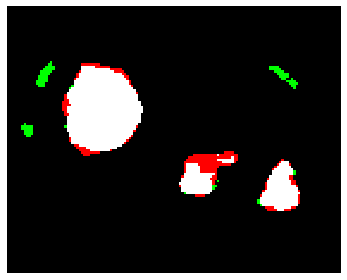

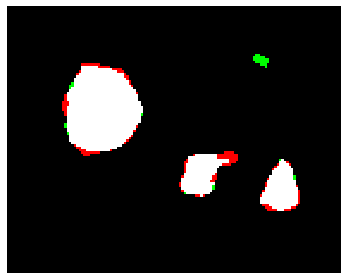

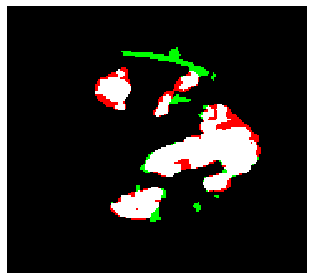

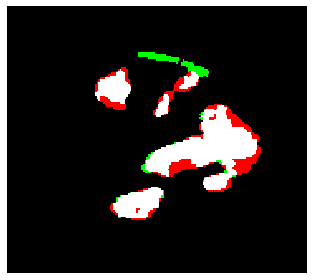

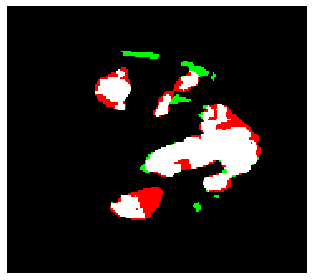

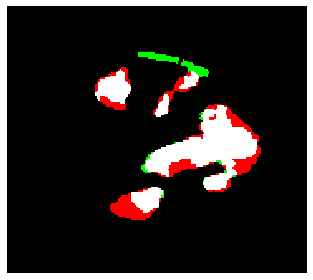

images created


In [24]:
# create 2D image of the ground truth images
create_images(datasets = colored_heuristic_images, savedir = RESULTS_IMG_HEURISTICS_PATH)

# U-net segmentations

In [25]:
# load the u-net segmentations
openfile_iternumber = 6
org_unet_images = load_data_pickle(PATH = DATA_UNET_PATH, filename='org_unet_images' + str(openfile_iternumber))
gt_unet_images = load_data_pickle(PATH = DATA_UNET_PATH, filename='gt_unet_images' + str(openfile_iternumber))
pred_unet_images = load_data_pickle(PATH = DATA_UNET_PATH, filename='pred_unet_images' + str(openfile_iternumber))

In [26]:
# make colored image
def generate_unet_colorimage(predicted_datasets, gt_datasets):
    """ Generate the colored predicted image. """
    
    datasets = {}
 
    # compare the predicted images to the ground truth 
    for predicted_key, predicted_image in predicted_datasets.items():
        image = create_colors(gt_datasets[predicted_key], predicted_image)
        
        # Save images in datasets dictionary
        datasets.update({predicted_key: image})
        
    print("datasets created") 
    return datasets


In [27]:
colored_unet_images = generate_unet_colorimage(pred_unet_images, gt_unet_images)

datasets created


In [28]:
# create subdirectories for the u-net results
# because the input image and ground truth now contain an additional padding
# for the animations
RESULTS_UNET_ORG_PATH = os.path.join(RESULTS_UNET_PATH, 'results_unet_original')
RESULTS_UNET_GT_PATH = os.path.join(RESULTS_UNET_PATH, 'results_unet_groundtruth')
RESULTS_UNET_PRED_PATH = os.path.join(RESULTS_UNET_PATH, 'results_unet_prediction')

create_dir(RESULTS_UNET_ORG_PATH)
create_dir(RESULTS_UNET_GT_PATH)
create_dir(RESULTS_UNET_PRED_PATH)


Directory results_volumes\results_volumes_animations\animations_unet\results_unet_original created
Directory results_volumes\results_volumes_animations\animations_unet\results_unet_groundtruth created
Directory results_volumes\results_volumes_animations\animations_unet\results_unet_prediction created


In [29]:
# create animations of the original u-net images
create_animations(datasets = org_unet_images, savedir = RESULTS_UNET_ORG_PATH)

  0%|                                                                                           | 0/21 [00:00<?, ?it/s]MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Animate: 21 datasets


100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [48:05<00:00, 137.38s/it]

animations created


In [30]:
# create animations of the ground truth u-net images
create_animations(datasets = gt_unet_images, savedir = RESULTS_UNET_GT_PATH)

  0%|                                                                                           | 0/21 [00:00<?, ?it/s]MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Animate: 21 datasets


100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [48:06<00:00, 137.48s/it]

animations created


In [31]:
# create animations of the predicted u-net images
create_animations(datasets = colored_unet_images, savedir = RESULTS_UNET_PRED_PATH)

  0%|                                                                                           | 0/21 [00:00<?, ?it/s]MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Animate: 21 datasets


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [24:58<00:00, 71.37s/it]

animations created


In [32]:
def create_unet_images(datasets, savedir, phasetype = 'org'):
    """ Create the middle 2D slice of the 3D image of all datasets. """
    
    for data, image in datasets.items(): 
        print(data)
        savename = savedir + '/' + phasetype + '_' + data 
        index = round(image.shape[0] /2.)
        print(image.shape)
        print(index ,'/', image.shape[0])
        
        plt.imshow(image[index,:,:], cmap='gray') 
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(savename + '.png')
        plt.show()
            
    print('images created')
    

In [33]:
# for the 2D slices save in different directions
RESULTS_UNET_IMG_COR_PATH = os.path.join(RESULTS_IMG_UNET_PATH, 'results_unet_coronal')
RESULTS_UNET_IMG_AXIAL_PATH = os.path.join(RESULTS_IMG_UNET_PATH, 'results_unet_axial')
RESULTS_UNET_IMG_SAG_PATH = os.path.join(RESULTS_IMG_UNET_PATH, 'results_unet_sagittal')

create_dir(RESULTS_UNET_IMG_COR_PATH)
create_dir(RESULTS_UNET_IMG_AXIAL_PATH)
create_dir(RESULTS_UNET_IMG_SAG_PATH)

Directory results_volumes\results_volumes_animations\images_unet\results_unet_coronal created
Directory results_volumes\results_volumes_animations\images_unet\results_unet_axial created
Directory results_volumes\results_volumes_animations\images_unet\results_unet_sagittal created


dataset1_elu_org6
(151, 224, 192)
76 / 151


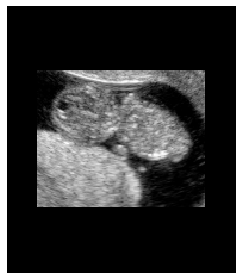

dataset2_elu_org6
(115, 224, 192)
58 / 115


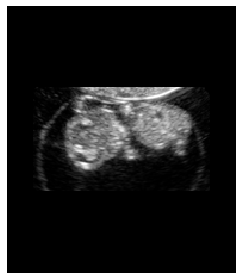

dataset3_elu_org6
(104, 224, 192)
52 / 104


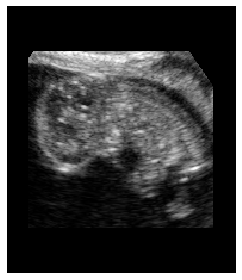

dataset4_elu_org6
(143, 224, 192)
72 / 143


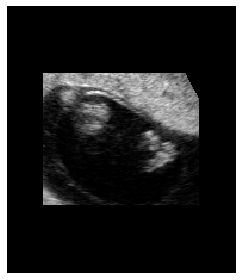

dataset5_elu_org6
(207, 224, 192)
104 / 207


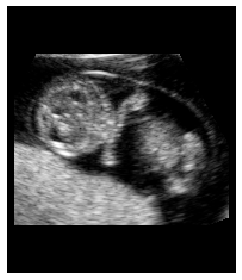

dataset6_elu_org6
(180, 224, 192)
90 / 180


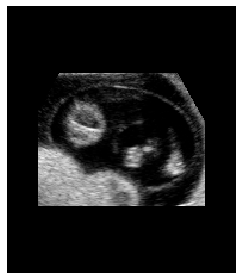

dataset7_elu_org6
(184, 224, 192)
92 / 184


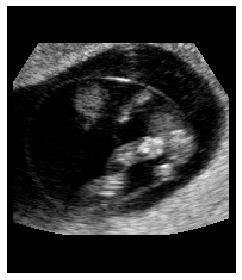

dataset1_elu_smoothed6
(151, 224, 192)
76 / 151


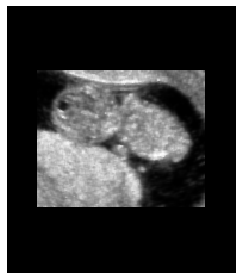

dataset2_elu_smoothed6
(115, 224, 192)
58 / 115


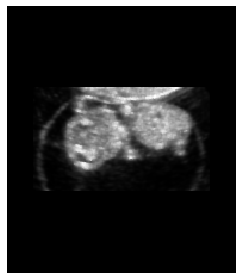

dataset3_elu_smoothed6
(104, 224, 192)
52 / 104


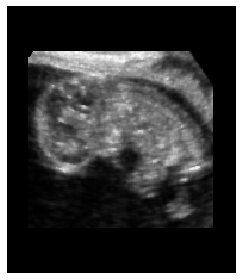

dataset4_elu_smoothed6
(143, 224, 192)
72 / 143


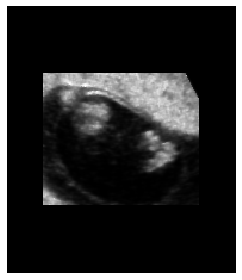

dataset5_elu_smoothed6
(207, 224, 192)
104 / 207


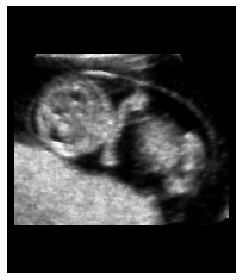

dataset6_elu_smoothed6
(180, 224, 192)
90 / 180


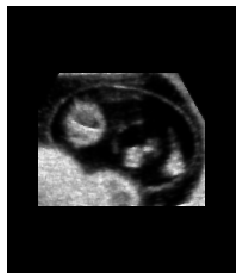

dataset7_elu_smoothed6
(184, 224, 192)
92 / 184


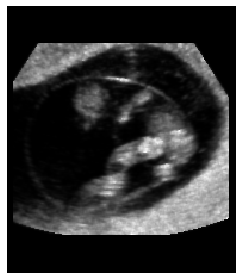

dataset1_relu_smoothed6
(151, 224, 192)
76 / 151


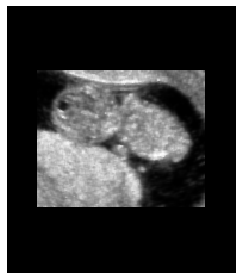

dataset2_relu_smoothed6
(115, 224, 192)
58 / 115


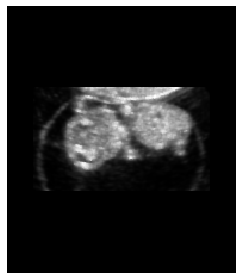

dataset3_relu_smoothed6
(104, 224, 192)
52 / 104


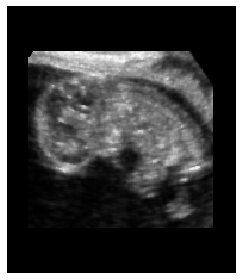

dataset4_relu_smoothed6
(143, 224, 192)
72 / 143


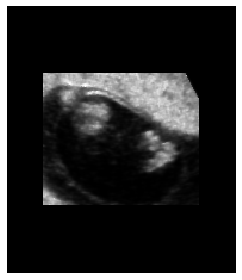

dataset5_relu_smoothed6
(207, 224, 192)
104 / 207


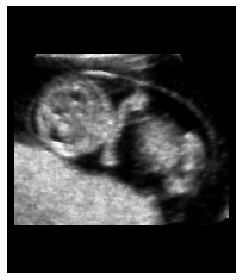

dataset6_relu_smoothed6
(180, 224, 192)
90 / 180


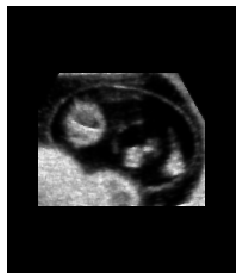

dataset7_relu_smoothed6
(184, 224, 192)
92 / 184


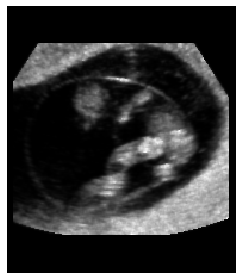

images created
dataset1_elu_org6
(151, 224, 192)
76 / 151


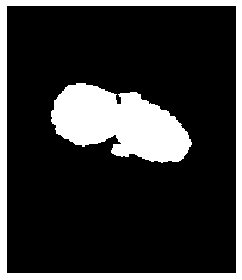

dataset2_elu_org6
(115, 224, 192)
58 / 115


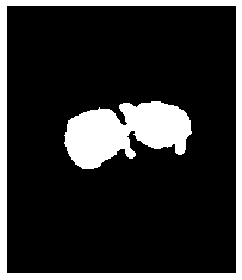

dataset3_elu_org6
(104, 224, 192)
52 / 104


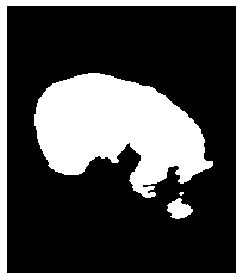

dataset4_elu_org6
(143, 224, 192)
72 / 143


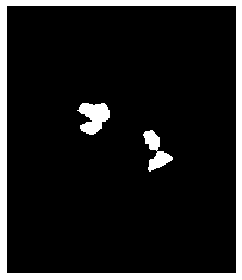

dataset5_elu_org6
(207, 224, 192)
104 / 207


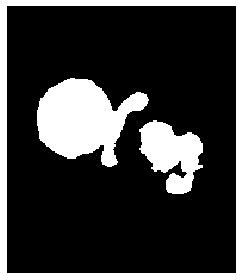

dataset6_elu_org6
(180, 224, 192)
90 / 180


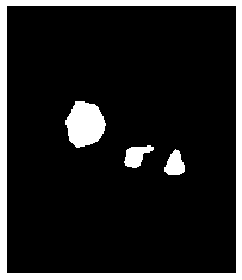

dataset7_elu_org6
(184, 224, 192)
92 / 184


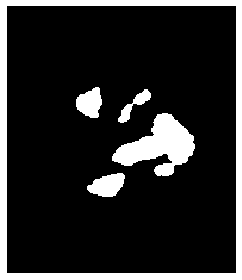

dataset1_elu_smoothed6
(151, 224, 192)
76 / 151


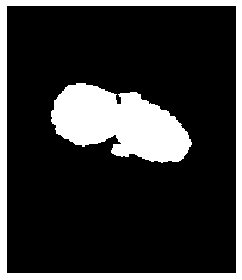

dataset2_elu_smoothed6
(115, 224, 192)
58 / 115


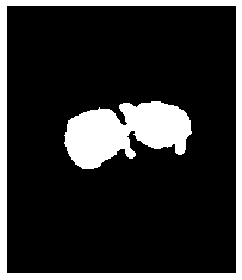

dataset3_elu_smoothed6
(104, 224, 192)
52 / 104


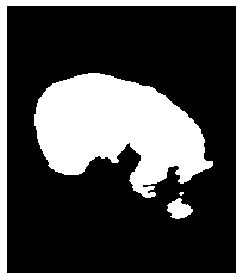

dataset4_elu_smoothed6
(143, 224, 192)
72 / 143


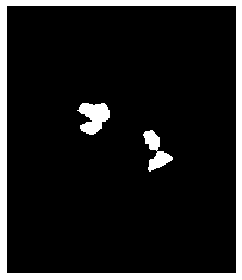

dataset5_elu_smoothed6
(207, 224, 192)
104 / 207


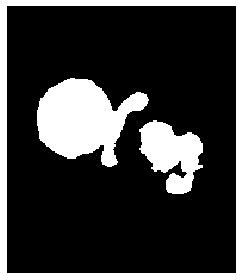

dataset6_elu_smoothed6
(180, 224, 192)
90 / 180


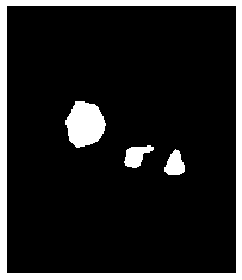

dataset7_elu_smoothed6
(184, 224, 192)
92 / 184


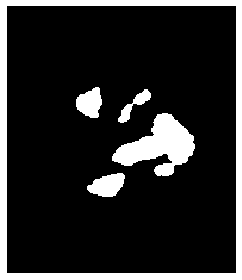

dataset1_relu_smoothed6
(151, 224, 192)
76 / 151


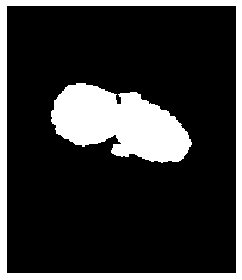

dataset2_relu_smoothed6
(115, 224, 192)
58 / 115


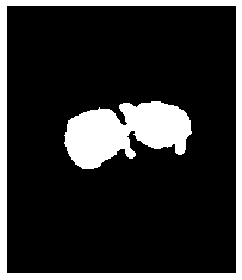

dataset3_relu_smoothed6
(104, 224, 192)
52 / 104


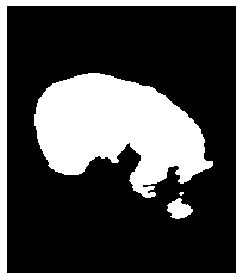

dataset4_relu_smoothed6
(143, 224, 192)
72 / 143


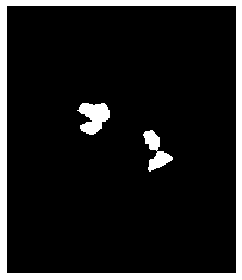

dataset5_relu_smoothed6
(207, 224, 192)
104 / 207


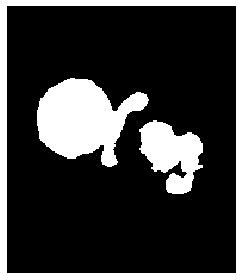

dataset6_relu_smoothed6
(180, 224, 192)
90 / 180


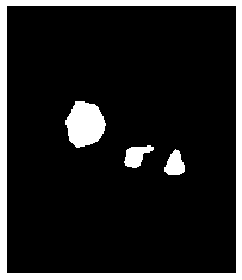

dataset7_relu_smoothed6
(184, 224, 192)
92 / 184


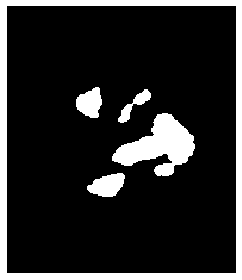

images created
dataset1_elu_org6
(151, 224, 192, 3)
76 / 151


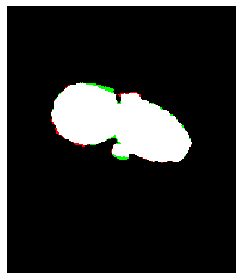

dataset2_elu_org6
(115, 224, 192, 3)
58 / 115


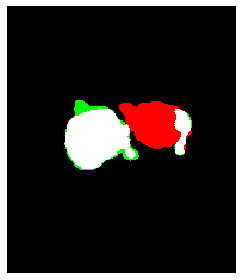

dataset3_elu_org6
(104, 224, 192, 3)
52 / 104


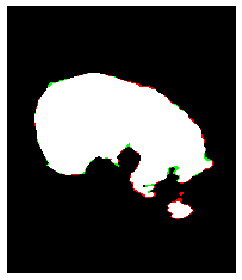

dataset4_elu_org6
(143, 224, 192, 3)
72 / 143


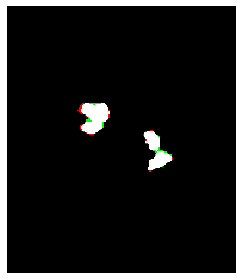

dataset5_elu_org6
(207, 224, 192, 3)
104 / 207


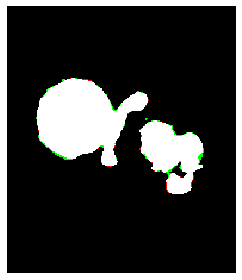

dataset6_elu_org6
(180, 224, 192, 3)
90 / 180


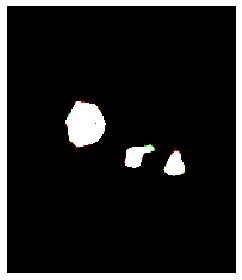

dataset7_elu_org6
(184, 224, 192, 3)
92 / 184


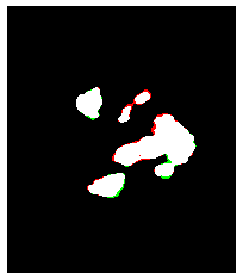

dataset1_elu_smoothed6
(151, 224, 192, 3)
76 / 151


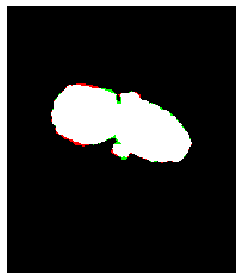

dataset2_elu_smoothed6
(115, 224, 192, 3)
58 / 115


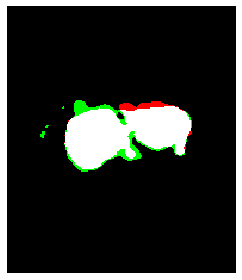

dataset3_elu_smoothed6
(104, 224, 192, 3)
52 / 104


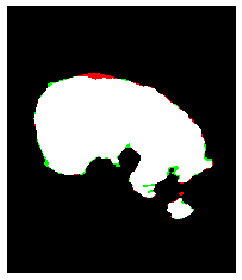

dataset4_elu_smoothed6
(143, 224, 192, 3)
72 / 143


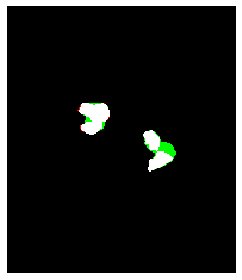

dataset5_elu_smoothed6
(207, 224, 192, 3)
104 / 207


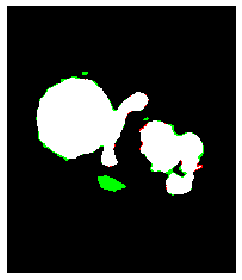

dataset6_elu_smoothed6
(180, 224, 192, 3)
90 / 180


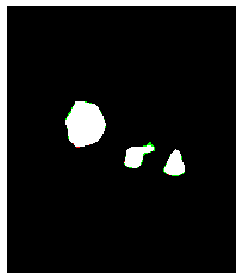

dataset7_elu_smoothed6
(184, 224, 192, 3)
92 / 184


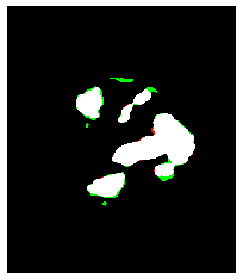

dataset1_relu_smoothed6
(151, 224, 192, 3)
76 / 151


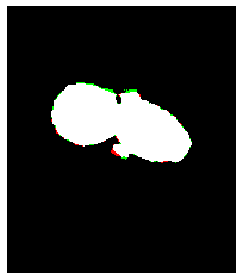

dataset2_relu_smoothed6
(115, 224, 192, 3)
58 / 115


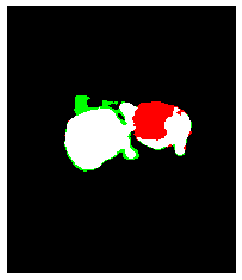

dataset3_relu_smoothed6
(104, 224, 192, 3)
52 / 104


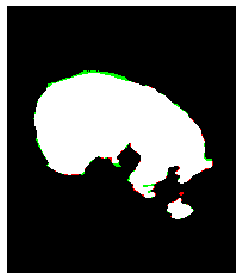

dataset4_relu_smoothed6
(143, 224, 192, 3)
72 / 143


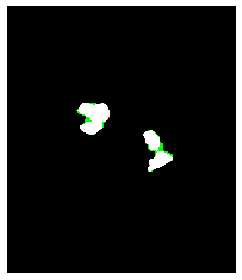

dataset5_relu_smoothed6
(207, 224, 192, 3)
104 / 207


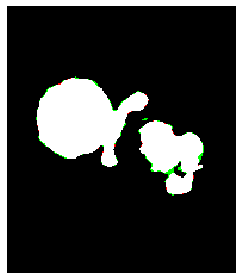

dataset6_relu_smoothed6
(180, 224, 192, 3)
90 / 180


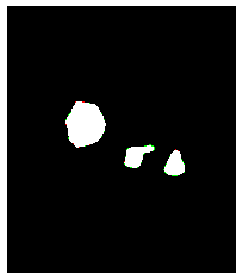

dataset7_relu_smoothed6
(184, 224, 192, 3)
92 / 184


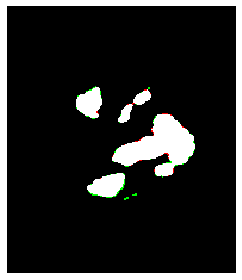

images created


In [34]:
# create 2D image of the u-net images in coronal direction (based on dataset1)
create_unet_images(datasets = org_unet_images, savedir = RESULTS_UNET_IMG_COR_PATH, phasetype='org')
create_unet_images(datasets = gt_unet_images, savedir = RESULTS_UNET_IMG_COR_PATH, phasetype='gt')
create_unet_images(datasets = colored_unet_images, savedir = RESULTS_UNET_IMG_COR_PATH, phasetype='pred')

In [35]:
def create_unet_images_axial(datasets, savedir, phasetype = 'org'):
    """ Create the mean image of all datasets. """
    
    for data, image in datasets.items():        
        savename = savedir + '/' + phasetype + '_' + data 
        index = round(image.shape[0] /2.)
        
        plt.imshow(image[:,index,:], cmap='gray') 
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(savename + '.png')
        plt.show()
            
    print('images created')

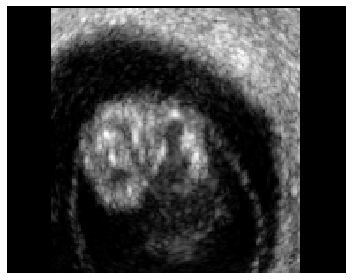

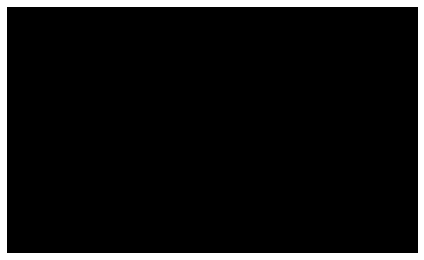

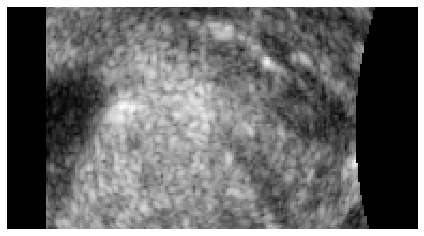

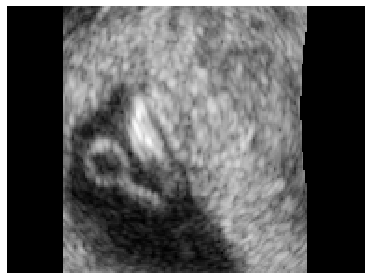

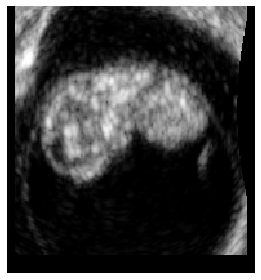

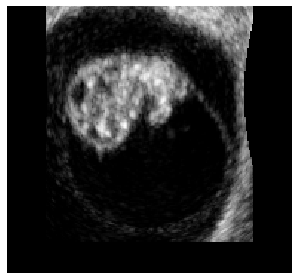

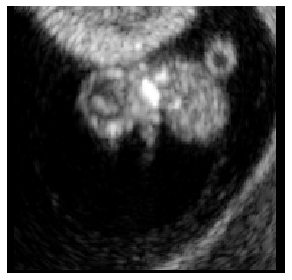

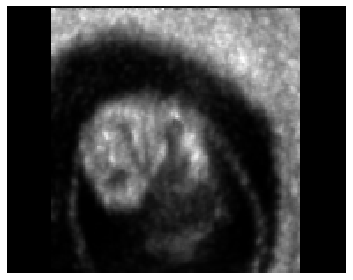

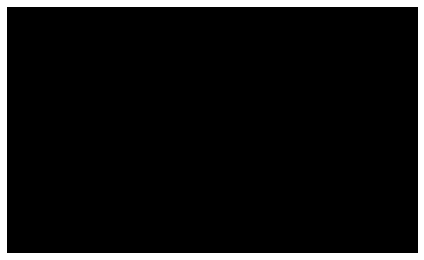

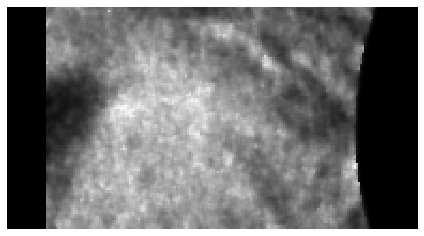

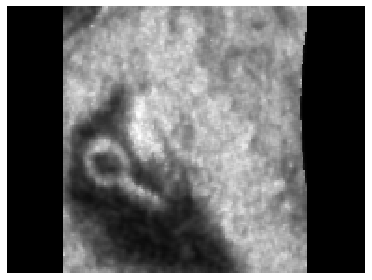

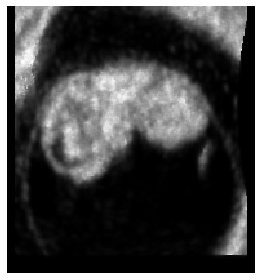

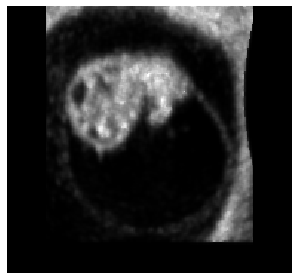

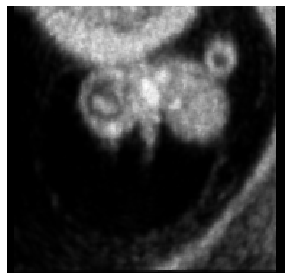

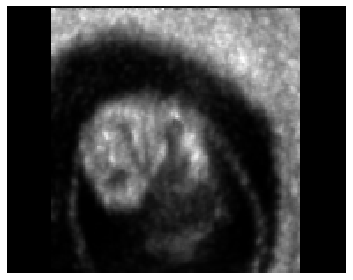

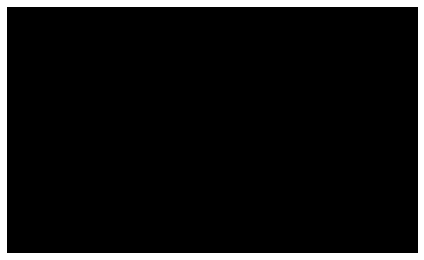

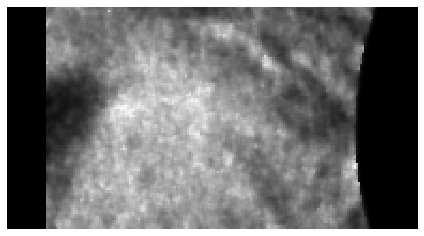

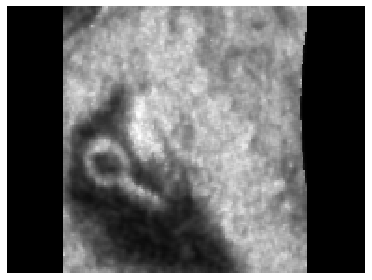

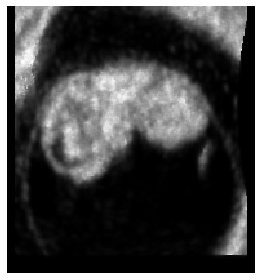

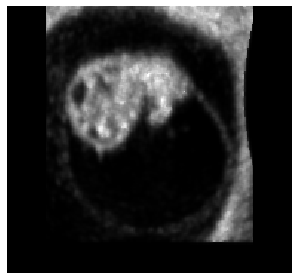

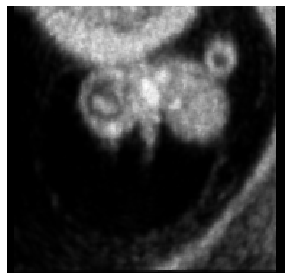

images created


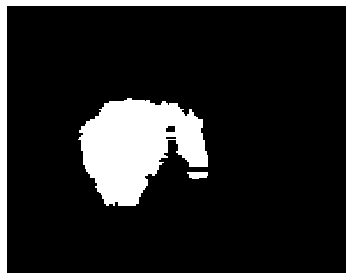

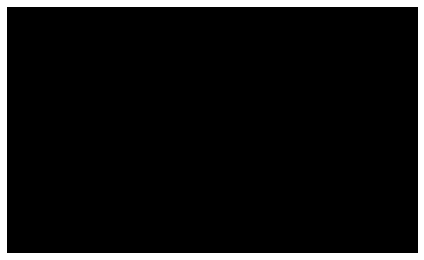

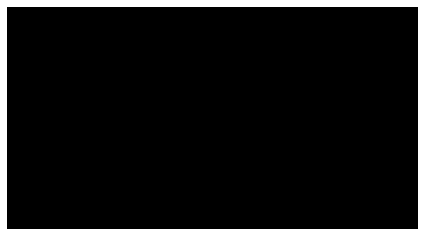

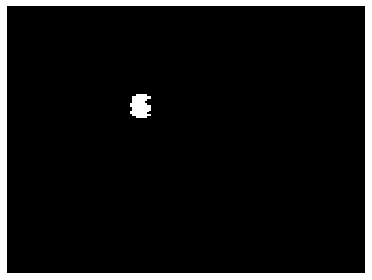

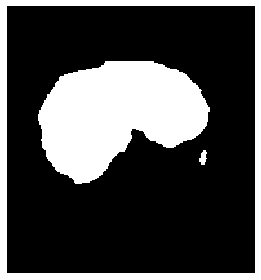

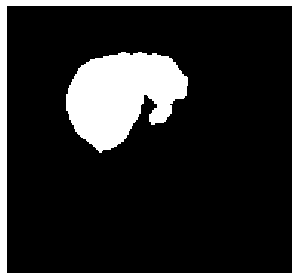

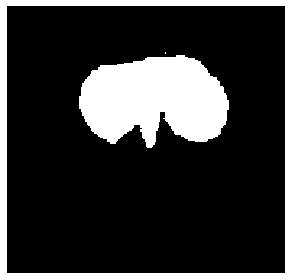

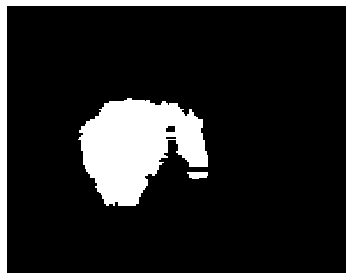

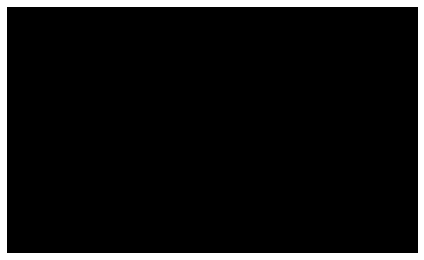

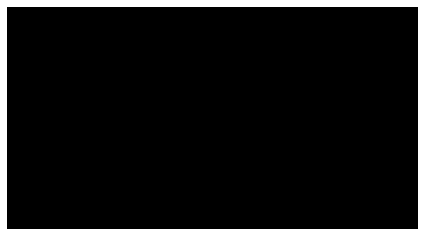

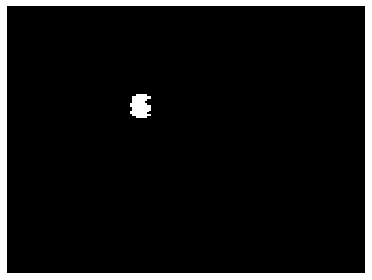

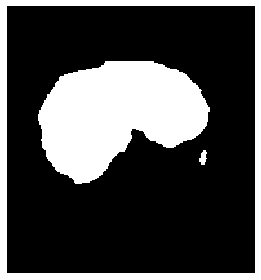

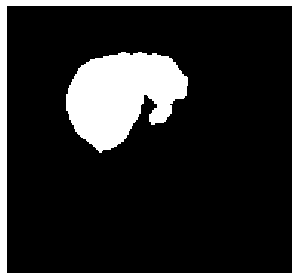

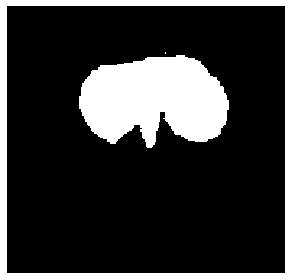

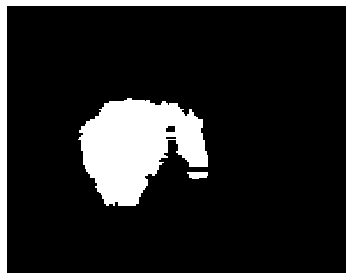

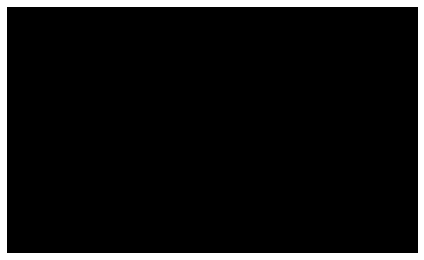

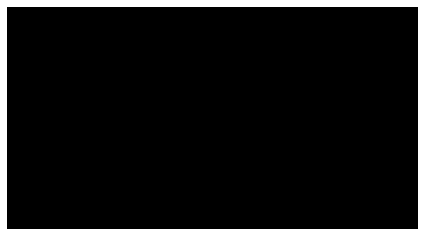

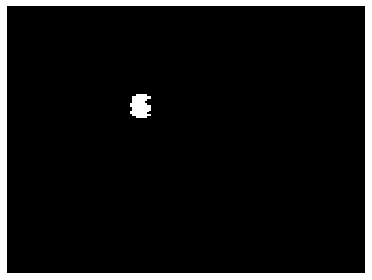

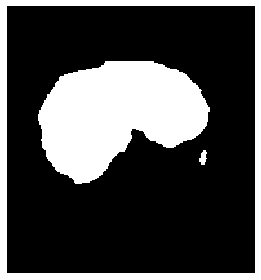

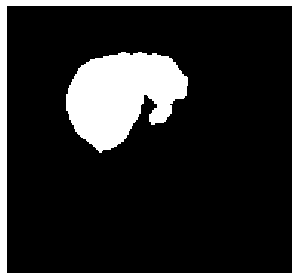

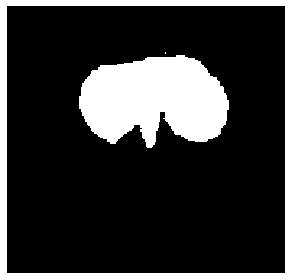

images created


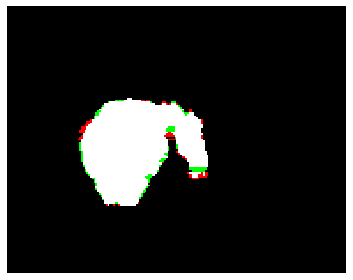

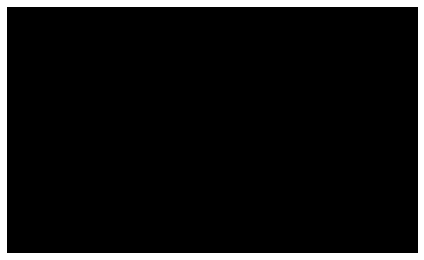

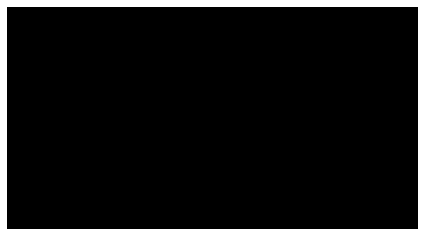

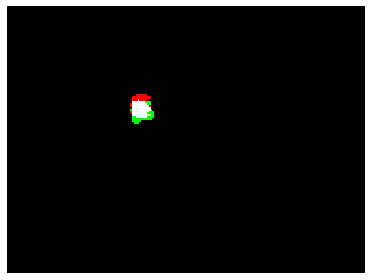

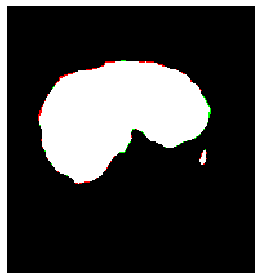

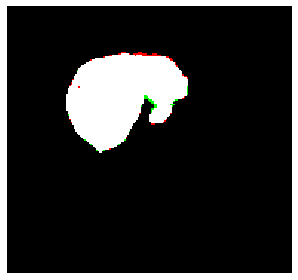

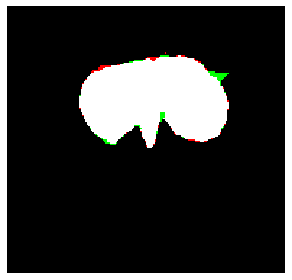

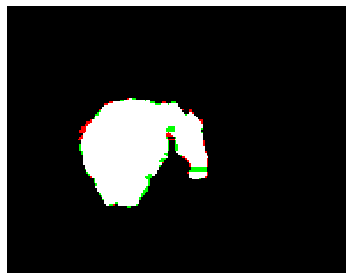

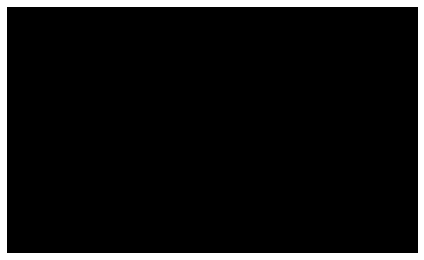

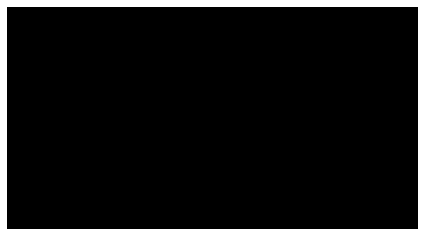

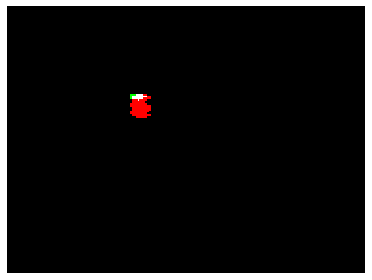

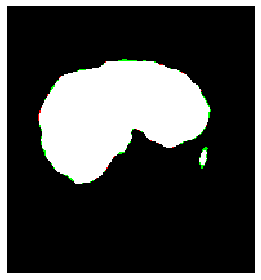

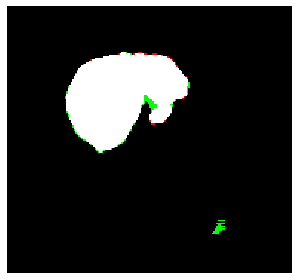

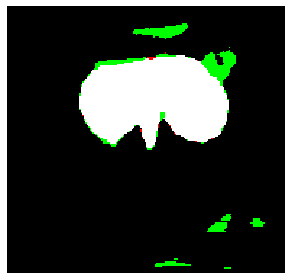

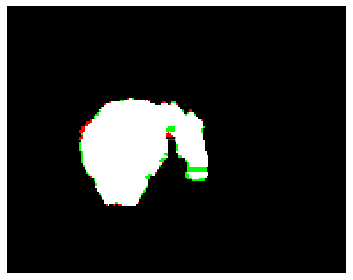

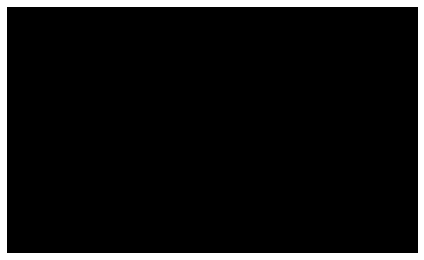

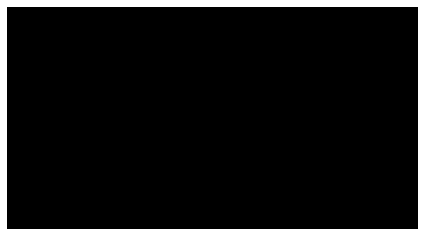

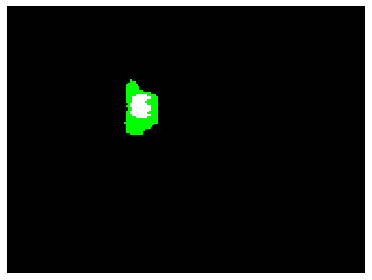

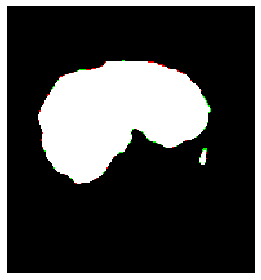

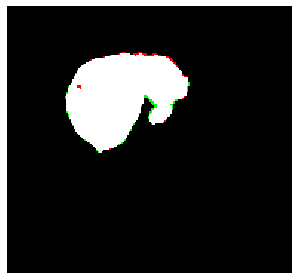

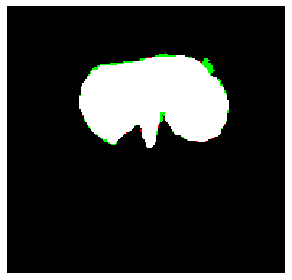

images created


In [36]:
# create 2D image of the u-net images in axial direction (based on dataset1)
create_unet_images_axial(datasets = org_unet_images, savedir = RESULTS_UNET_IMG_AXIAL_PATH, phasetype='org')
create_unet_images_axial(datasets = gt_unet_images, savedir = RESULTS_UNET_IMG_AXIAL_PATH, phasetype='gt')
create_unet_images_axial(datasets = colored_unet_images, savedir = RESULTS_UNET_IMG_AXIAL_PATH, phasetype='pred')


In [37]:
def create_unet_images_sagittal(datasets, savedir, phasetype = 'org'):
    """ Create the mean image of all datasets. """
    
    for data, image in datasets.items():        
        savename = savedir + '/' + phasetype + '_' + data 
        index = round(image.shape[0] /2.)
        
        plt.imshow(image[:,:,index], cmap='gray') 
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(savename + '.png')
        plt.show()
            
    print('images created')

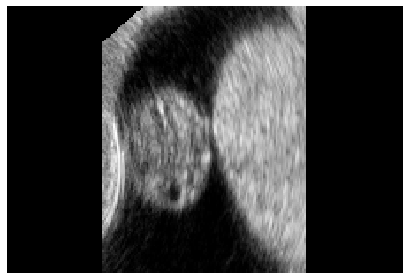

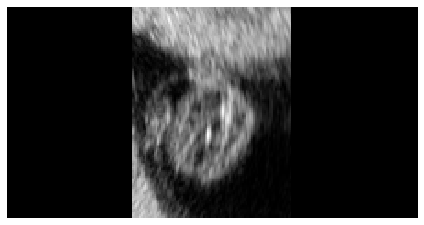

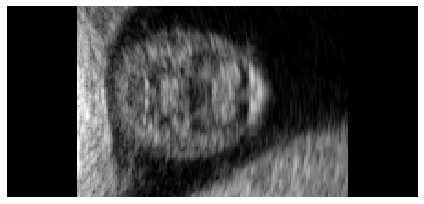

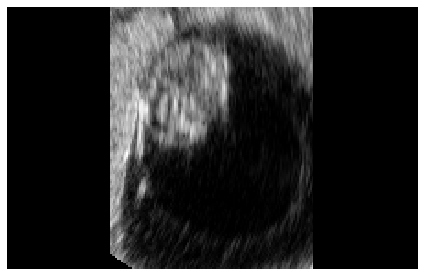

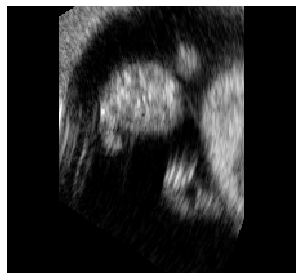

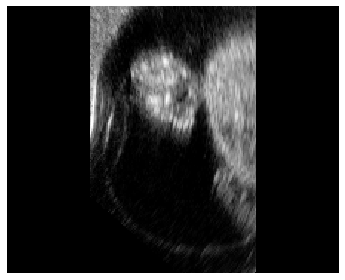

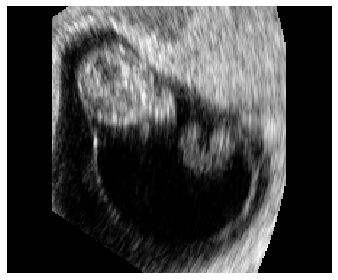

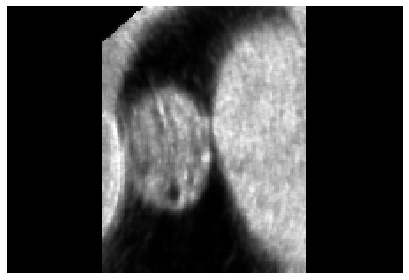

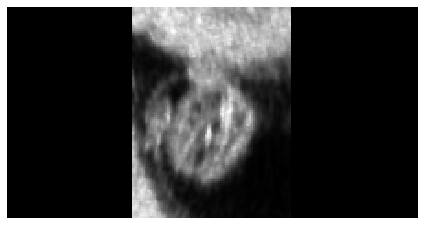

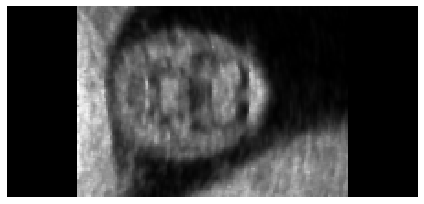

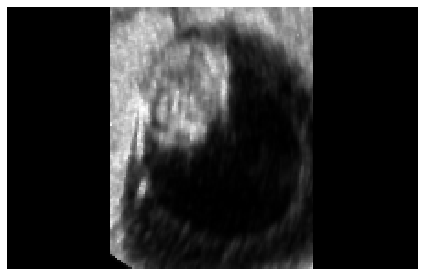

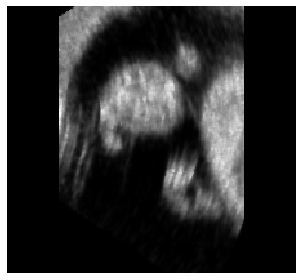

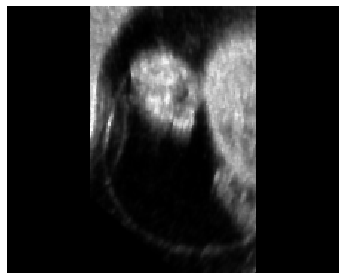

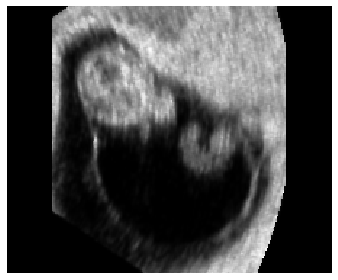

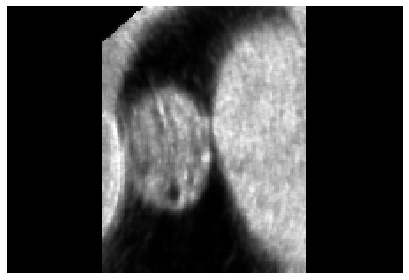

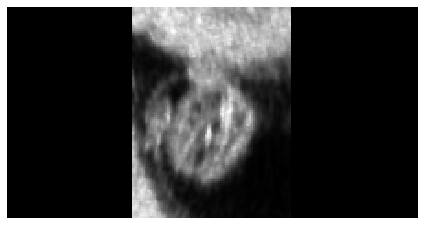

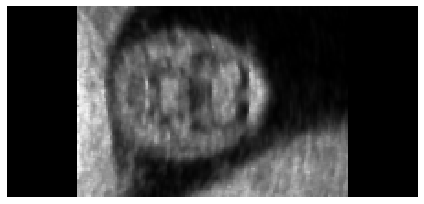

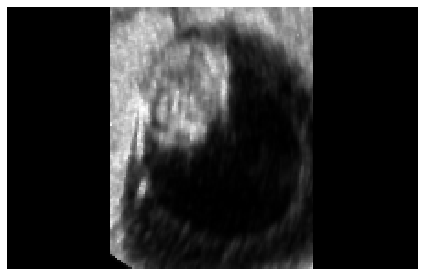

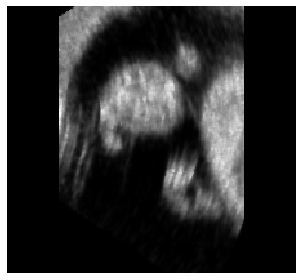

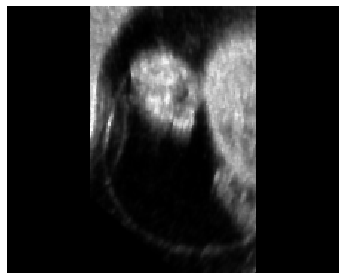

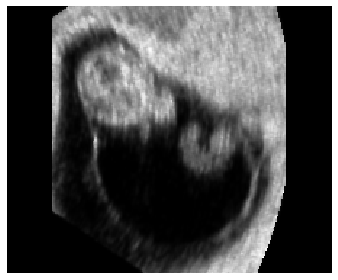

images created


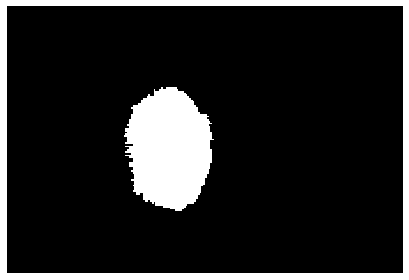

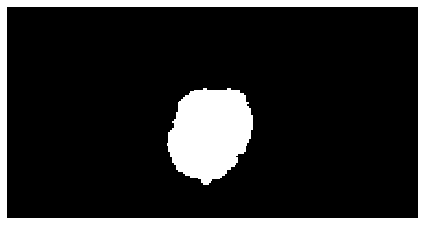

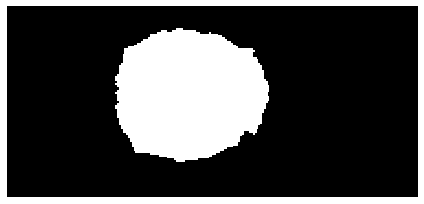

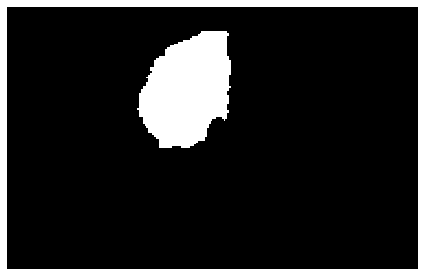

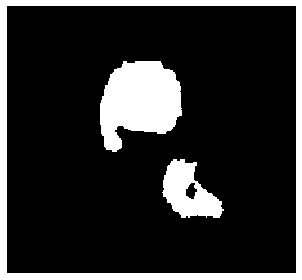

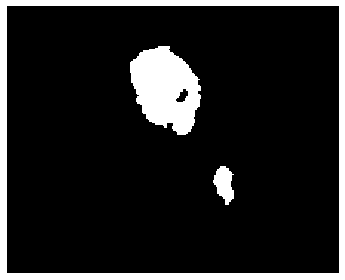

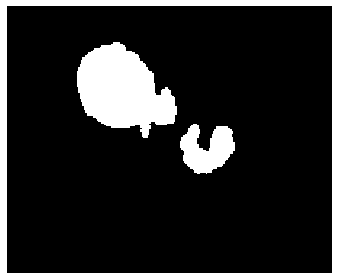

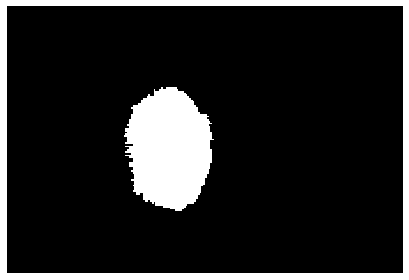

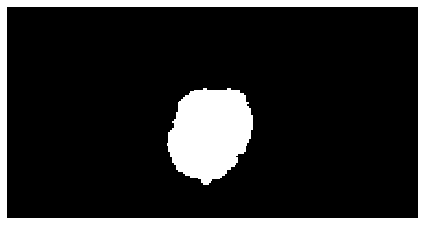

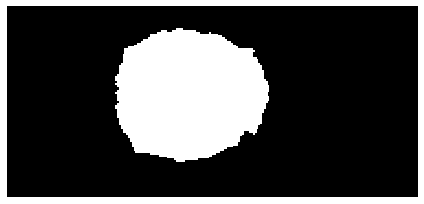

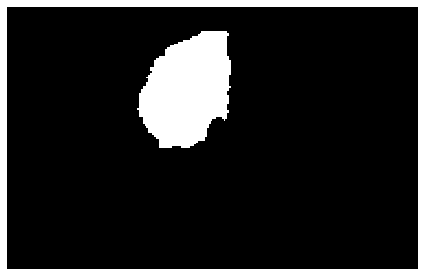

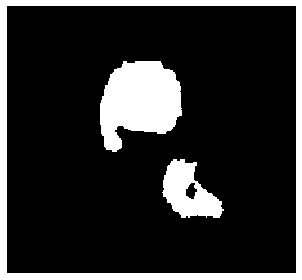

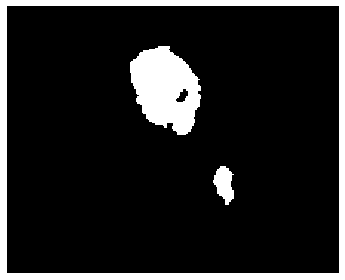

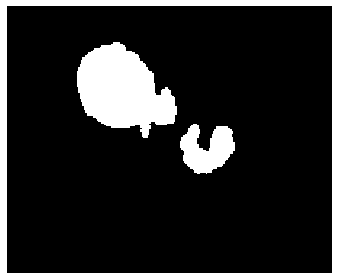

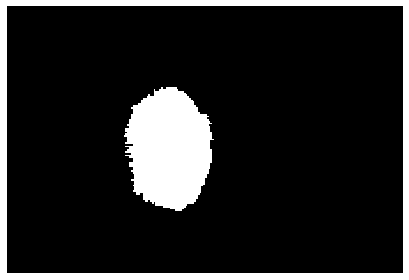

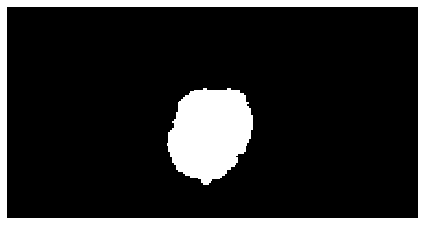

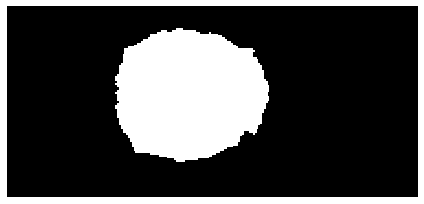

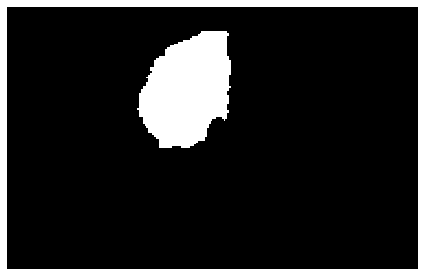

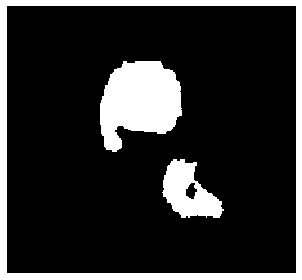

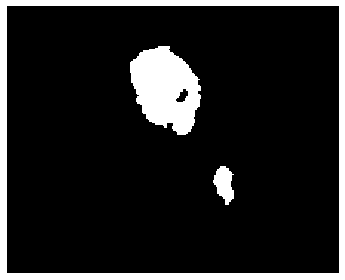

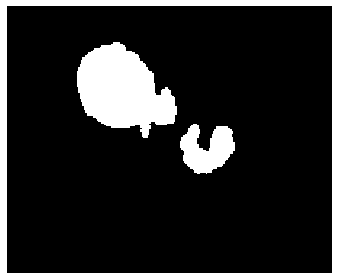

images created


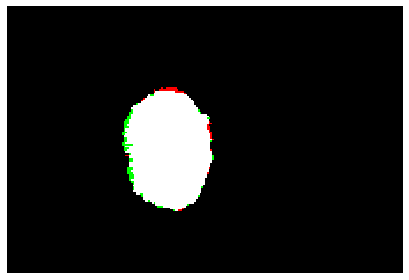

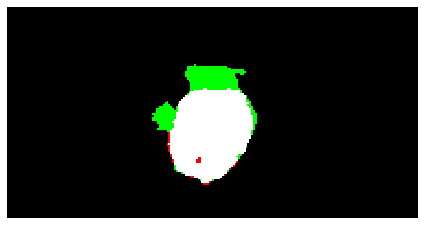

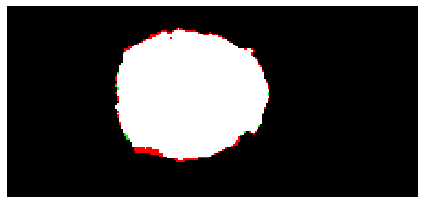

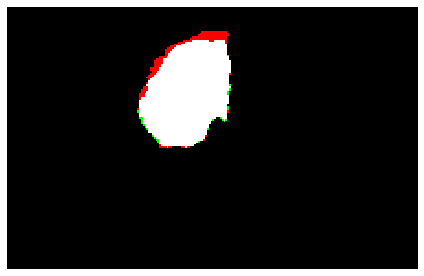

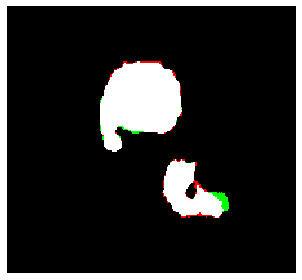

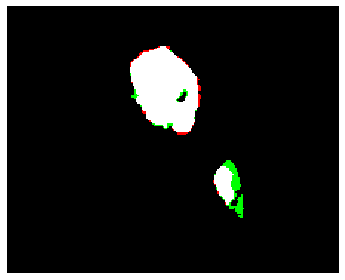

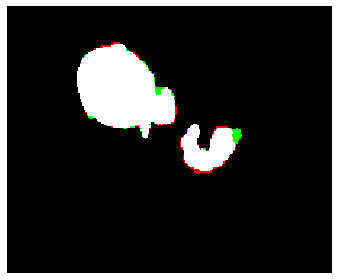

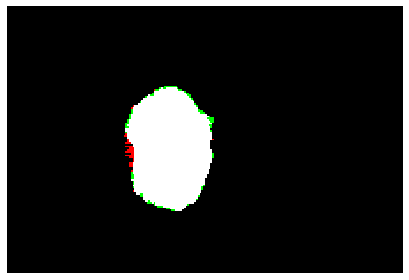

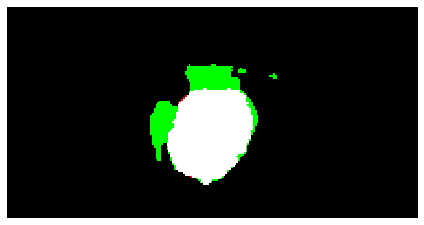

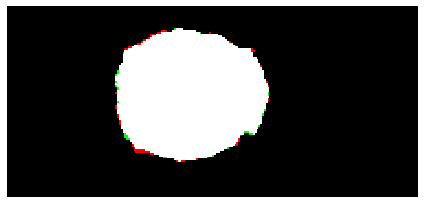

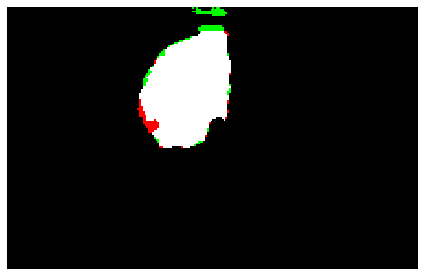

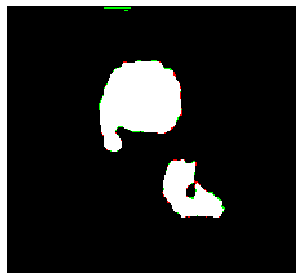

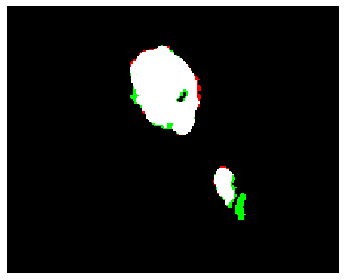

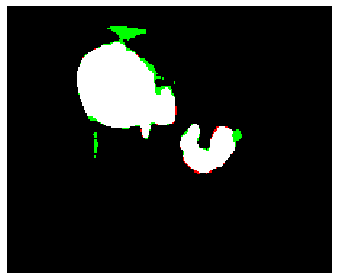

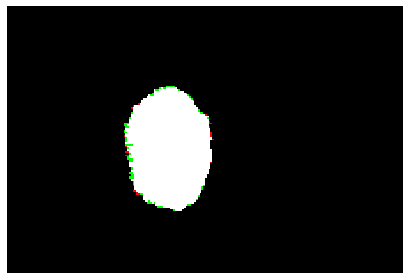

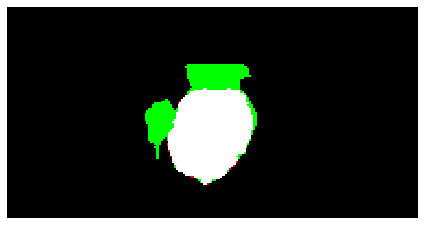

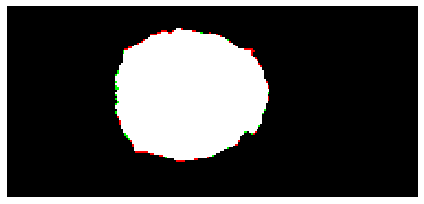

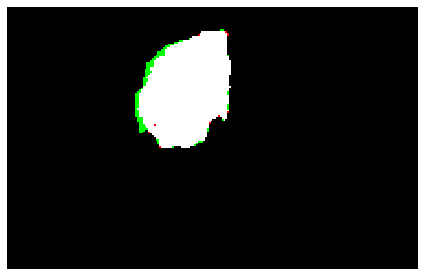

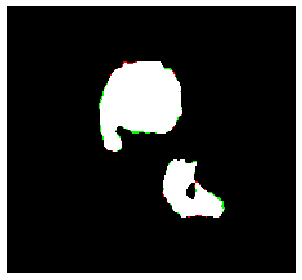

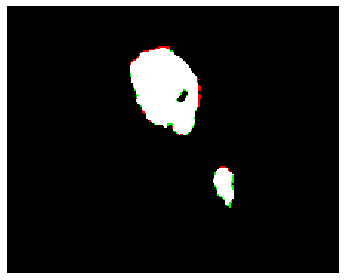

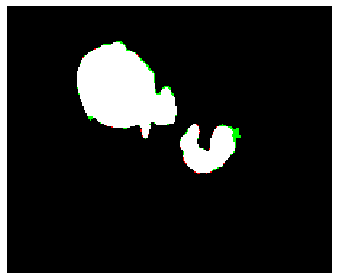

images created


In [38]:
# create 2D image of the u-net images in axial direction (based on dataset1)
create_unet_images_sagittal(datasets = org_unet_images, savedir = RESULTS_UNET_IMG_SAG_PATH, phasetype='org')
create_unet_images_sagittal(datasets = gt_unet_images, savedir = RESULTS_UNET_IMG_SAG_PATH, phasetype='gt')
create_unet_images_sagittal(datasets = colored_unet_images, savedir = RESULTS_UNET_IMG_SAG_PATH, phasetype='pred')
